This is a practice file, working with EEG data from the muse and manipulating it. 

In [1]:
#weird importing of libraries, very annoying, even with environment running into problems

import pandas
#pandas is a library that makes working with large data sets easier, especially csv type files (i think?)
import mne
#general library for handling EEG data

In [4]:
#PRACTICE IMPORTING DATA
#pandas is a library that makes working with large csv files faster and easier

#it is helpful to make a dictionary, to have convienient access to each data set

raw_recordings={
    "Jacob_Practice_1":pandas.read_csv("Data/Jacob_Practice_1.csv")
    
}

#good idea to print the head of each dataset to verify that it has worked

for key in raw_recordings:
    print(f"\n{key}") 
    print(raw_recordings[key].head())



Jacob_Practice_1
     timestamps     TP9     AF7     AF8   TP10  Right AUX
0  1.669165e+09  13.184  36.133  39.062  4.395     22.461
1  1.669165e+09  11.230  29.785  36.621 -1.953      4.395
2  1.669165e+09  18.555  32.227  42.480 -3.906      3.418
3  1.669165e+09  17.090  31.250  36.133 -3.906    -29.785
4  1.669165e+09  16.113  28.320  31.738 -0.488    -12.695


Creating RawArray with float64 data, n_channels=6, n_times=6428
    Range : 0 ... 6427 =      0.000 ...    25.105 secs
Ready.
Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_44720\4084541239.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd(picks=["AF7","AF8","TP9","TP10"],fmin=8,fmax=13)


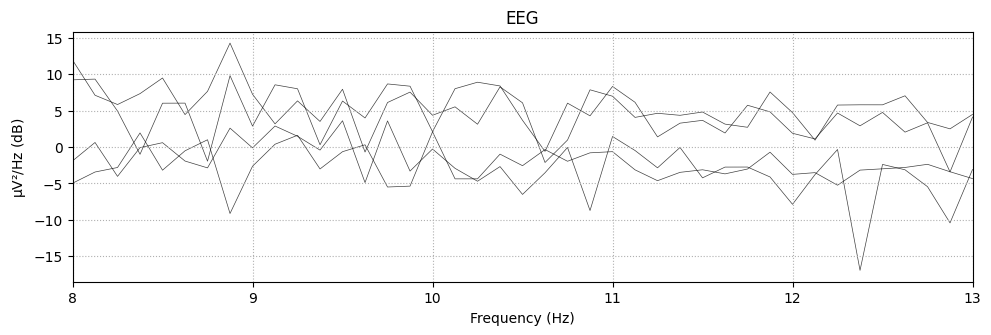

Effective window size : 1.000 (s)
(array([[2.01457255e-12, 2.55472808e-12, 1.84392321e-12, 1.14008498e-12,
        8.06249212e-13, 8.72379839e-13],
       [1.64830324e-12, 1.82835762e-12, 2.09972756e-12, 1.08129695e-12,
        6.78086594e-13, 1.34834604e-12],
       [2.54067908e-11, 1.94689783e-11, 1.47294091e-11, 9.37294353e-12,
        5.45006235e-12, 4.47288450e-12],
       [2.62369555e-11, 1.98063537e-11, 1.30691314e-11, 1.01780638e-11,
        8.05238340e-12, 5.49699200e-12]]), array([ 8.,  9., 10., 11., 12., 13.]))


In [17]:
#handling power spectral display

#this gives MNE some data to handle the 
#mne.create_info(ch_names, sfreq, ch_types='misc', verbose=None)
info = mne.create_info(["timestamps","TP9","AF7","AF8", "TP10", "Right AUX"], 256, ch_types="eeg")

#creates a dictionary, keys are dataset names, values are mne raw.array obejcts, note that the "info" variable is fed into the definition of the raw.data object
raw_data = {dataset_name : mne.io.RawArray(raw_recordings[dataset_name].values.T/1000000, info) for dataset_name in raw_recordings.keys()}

#prints psd data for each raw.data object in the above defined dictionary
#fmin and max can be used to specify the minimum and maximum frequencies that are plotted, the alpha band is 8-13 Hz
for key, data in raw_data.items():
        data.plot_psd(picks=["AF7","AF8","TP9","TP10"],fmin=8,fmax=13)

#mne.time_frequency.psd_welch , this command generates the power spectral density for some data set
#mne.time_frequency.psd_multitaper, this is another function to genererate the psd, using a different mathematical method, the difference
#between the Welch method I am unsure of 

#fmin and fmax specify the min and max frequencies that will be analyzed, the alpha band (which we are interested in is 8-13 Hz)
#picks is a list of the channels we would like to include in our analysis

#the plot psd function appears to not use the Welch method, as it returns relativly few data points compared to what is graphed, ignore this maybe idk

for key, data in raw_data.items():
    psd_raw=mne.time_frequency.psd_welch(data,fmin=8,fmax=13,picks=["AF7","AF8","TP9","TP10"])
    print(psd_raw)


#the output of the function is two arrays, 4xn array where the 4 channels are represented by 4 vectors of n valuables representing the power at
#the n frequencies

#from here how can we take the domininant frequency? 